## Supplementary Figure - LOIO comparisons

We present the primary LOIO results in figure 4.
This figure supplements the main results there.

### Panels

- A: The distribution of probabilities per correct rank per feature space


In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(patchwork))

# Load variables important for plotting (e.g., themes, phenotypes, etc.)
source("themes.r")

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘patchwork’ was built under R version 4.2.3”


In [2]:
# Set I/O
results_dir <- file.path("..", "3.evaluate_model", "evaluations", "LOIO_probas")

# Results from `get_LOIO_probabilities.ipynb`
results_file <- file.path(results_dir, "compiled_LOIO_probabilities.tsv")

# Results from `LOIO_evaluation.ipynb`
results_summary_file <- file.path(results_dir, "LOIO_summary_ranks.tsv.gz")
results_summary_perphenotype_file <- file.path(results_dir, "LOIO_summary_ranks_perphenotype.tsv.gz")

output_fig_loio <- file.path("figures", "supplementary", "loio_supplement.png")

In [3]:
# Set custom labellers for adding context to facet text plotting
shuffled_labeller <- function(value) {
  paste("Shuffled:", value)
}

balanced_labeller <- function(value) {
  paste("Model:", value)
}

In [4]:
# Create phenotype categories dataframe
# Note: phenotype_categories defined in themes.r
phenotype_categories_df <- stack(phenotype_categories) %>%
  rename(Mitocheck_Category = ind, Mitocheck_Phenotypic_Class = values)

phenotype_categories_df

Mitocheck_Phenotypic_Class,Mitocheck_Category
<chr>,<fct>
Interphase,Interphase
Elongated,Interphase
Large,Interphase
Prometaphase,Mitosis
MetaphaseAlignment,Mitosis
Metaphase,Mitosis
Anaphase,Mitosis
Binuclear,Mitotic conseq.
Polylobed,Mitotic conseq.


In [5]:
loio_df <- readr::read_tsv(
    results_file,
    col_types = readr::cols(
        .default = "d",
        "Model_Phenotypic_Class" = "c",
        "Mitocheck_Phenotypic_Class" = "c",
        "Cell_UUID" = "c",
        "Metadata_DNA" = "c",
        "Model_type" = "c",
        "Balance_type" = "c",
        "Dataset_type" = "c",
        "Model_Feature_Type" = "c"
    )
) %>%
    dplyr::select(!`...1`) %>%
    dplyr::group_by(
        Cell_UUID,
        Model_type,
        Balance_type,
        Metadata_DNA,
        Mitocheck_Phenotypic_Class,
        Model_Feature_Type,
        Dataset_type,
        Model_C,
        Model_l1_ratio
    ) %>%
    dplyr::mutate(rank_value = rank(desc(Predicted_Probability))) %>%
    dplyr::mutate(correct_pred = paste(Mitocheck_Phenotypic_Class == Model_Phenotypic_Class)) %>%
    dplyr::left_join(
        phenotype_categories_df,
        by = "Mitocheck_Phenotypic_Class"
    ) %>%
    dplyr::left_join(
        phenotype_categories_df,
        by = c("Model_Phenotypic_Class" = "Mitocheck_Phenotypic_Class"),
        suffix = c("", "_model")
    ) %>%
    dplyr::mutate(
        correct_class_pred = paste(Mitocheck_Category == Mitocheck_Category_model)
    )

loio_df$rank_value <- factor(loio_df$rank_value, levels = paste(sort(unique(loio_df$rank_value))))

# The `feature_spaces` variable is defined in themes.r
loio_df$Model_Feature_Type <-
    dplyr::recode_factor(loio_df$Model_Feature_Type, !!!feature_spaces)

refactor_logical <- c("TRUE" = "TRUE", "FALSE" = "FALSE")
loio_df$correct_pred <-
    dplyr::recode_factor(loio_df$correct_pred, !!!refactor_logical)

loio_df$Shuffled <- dplyr::recode_factor(
    loio_df$Model_type,
    "final" = "FALSE", "shuffled_baseline" = "TRUE"
)

print(dim(loio_df))
head(loio_df, 5)

New names:
• `` -> `...1`


[1] 1710900      17


Cell_UUID,Metadata_DNA,Mitocheck_Phenotypic_Class,Model_Feature_Type,Model_C,Model_l1_ratio,Model_type,Dataset_type,Balance_type,Model_Phenotypic_Class,Predicted_Probability,rank_value,correct_pred,Mitocheck_Category,Mitocheck_Category_model,correct_class_pred,Shuffled
<chr>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>
0003588c-7dda-470c-91da-a88479654936,LT0067_02/LT0067_02_99_77.tif,Polylobed,CellProfiler,1.0,0.5,final,no_ic,balanced,ADCCM,4.149980e-04,8,FALSE,Mitotic conseq.,Other,FALSE,FALSE
0003588c-7dda-470c-91da-a88479654936,LT0067_02/LT0067_02_99_77.tif,Polylobed,CellProfiler,0.1,0.1,final,no_ic,unbalanced,ADCCM,8.154955e-04,8,FALSE,Mitotic conseq.,Other,FALSE,FALSE
0003588c-7dda-470c-91da-a88479654936,LT0067_02/LT0067_02_99_77.tif,Polylobed,CellProfiler,0.1,0.0,shuffled_baseline,no_ic,balanced,ADCCM,4.095926e-02,9,FALSE,Mitotic conseq.,Other,FALSE,TRUE
0003588c-7dda-470c-91da-a88479654936,LT0067_02/LT0067_02_99_77.tif,Polylobed,CellProfiler,0.1,1.0,shuffled_baseline,no_ic,unbalanced,ADCCM,2.673641e-02,15,FALSE,Mitotic conseq.,Other,FALSE,TRUE
0003588c-7dda-470c-91da-a88479654936,LT0067_02/LT0067_02_99_77.tif,Polylobed,CellProfiler,1.0,0.5,final,no_ic,balanced,Anaphase,5.038893e-07,14,FALSE,Mitotic conseq.,Mitosis,FALSE,FALSE


In [6]:
# Focus main result on select LOIO parameters:
# Balanced model, with ic, select feature spaces (CP, DP, CP_and_DP)
loio_focus_df <- loio_df %>%
    dplyr::filter(
        Balance_type == "balanced",
        Dataset_type == "ic",
        Model_Feature_Type %in% c("CellProfiler", "DeepProfiler", "CP and DP")
    )

## Panel A - LOIO rank vs. probability

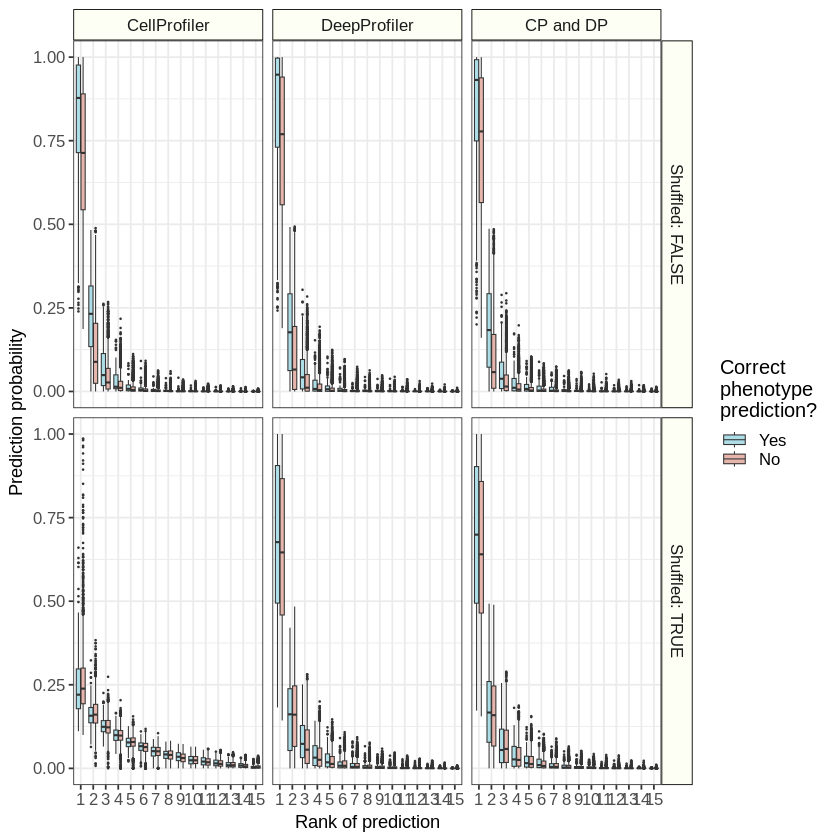

In [7]:
loio_feature_space_gg <- (
    ggplot(loio_focus_df,
        aes(x = rank_value, y = Predicted_Probability)
          )
    + geom_boxplot(aes(fill = correct_pred), outlier.size = 0.1, lwd = 0.3)
    + theme_bw()
    + phenotypic_ggplot_theme
    + facet_grid(
        "Shuffled~Model_Feature_Type",
        labeller = labeller(Shuffled = shuffled_labeller)
    )
    + labs(x = "Rank of prediction", y = "Prediction probability")
    + scale_fill_manual(
        "Correct\nphenotype\nprediction?",
        values = focus_corr_colors,
        labels = focus_corr_labels
    )
)

loio_feature_space_gg

## Calculate correct top predictions

- per phenotype
- per model type
- per feature space
- per balance type
- per no-ic

In [8]:
# Load per image, per phenotype, per feature space summary
loio_summary_per_phenotype_df <- readr::read_tsv(
    results_summary_file,
    col_types = readr::cols(
        .default = "d",
        "Metadata_DNA" = "c",
        "Model_type" = "c",
        "Mitocheck_Phenotypic_Class" = "c",
        "Balance_type" = "c",
        "Dataset_type" = "c",
        "Model_Feature_Type" = "c"
    )
) %>%
    dplyr::mutate(loio_label = "Leave one image out") %>%
    # Generate a new column that we will use for plotting
    # Note, we define focus_phenotypes in themes.r
    dplyr::mutate(Mitocheck_Plot_Label = if_else(
        Mitocheck_Phenotypic_Class %in% focus_phenotypes,
        Mitocheck_Phenotypic_Class,
        "Other"
    ))

loio_summary_per_phenotype_df$Model_Feature_Type <-
    dplyr::recode_factor(loio_summary_per_phenotype_df$Model_Feature_Type, !!!feature_spaces)

loio_summary_per_phenotype_df$Mitocheck_Plot_Label <-
    dplyr::recode_factor(loio_summary_per_phenotype_df$Mitocheck_Plot_Label, !!!focus_phenotype_labels)

loio_summary_per_phenotype_df$Shuffled <- dplyr::recode_factor(
    loio_summary_per_phenotype_df$Model_type,
    "final" = "FALSE", "shuffled_baseline" = "TRUE"
)

head(loio_summary_per_phenotype_df, 3)

Metadata_DNA,Model_type,Dataset_type,Mitocheck_Phenotypic_Class,Model_Feature_Type,Balance_type,Average_Rank,Average_P_Value,Min_IQR_Rank,Max_IQR_Rank,Min_IQR_P_Value,Max_IQR_P_Value,Count,loio_label,Mitocheck_Plot_Label,Shuffled
<chr>,<chr>,<chr>,<chr>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<fct>
LT0003_40/LT0003_40_149_83.tif,final,ic,Polylobed,CellProfiler,balanced,2.333333,0.6517965,1,3.0,0.4829059,0.9772513,3,Leave one image out,Other,FALSE
LT0003_40/LT0003_40_149_83.tif,final,ic,Polylobed,CellProfiler,unbalanced,2.333333,0.6537640,1,3.0,0.4851124,0.9802650,3,Leave one image out,Other,FALSE
LT0003_40/LT0003_40_149_83.tif,final,ic,Polylobed,CP and DP,balanced,2.000000,0.6522797,1,2.5,0.4843529,0.9776095,3,Leave one image out,Other,FALSE


In [9]:
length(unique(loio_summary_per_phenotype_df$Metadata_DNA))

[1] 270

In [10]:
percent_summary_df <- loio_summary_per_phenotype_df %>%
    dplyr::mutate(pass_on_average = Average_Rank < 2) %>%
    dplyr::filter(Shuffled == FALSE) %>%
    dplyr::group_by(
        Mitocheck_Phenotypic_Class,
        Model_Feature_Type,
        Balance_type,
        Model_type,
        Dataset_type
    ) %>%
    dplyr::mutate(total_pass = sum(pass_on_average), total_count = n()) %>%
    dplyr::mutate(
        percent_pass = round((total_pass / total_count) * 100, 1)
    ) %>%
    dplyr::select(
        Mitocheck_Phenotypic_Class,
        Model_Feature_Type,
        Balance_type,
        Model_type,
        Shuffled,
        Dataset_type,
        percent_pass,
        total_pass,
        total_count
    ) %>%
    dplyr::distinct() %>%
    dplyr::ungroup() %>%
    dplyr::mutate(add_plot_text = paste0(total_pass, "/", total_count, "\n", "(", percent_pass, "%)"))

head(percent_summary_df)

Mitocheck_Phenotypic_Class,Model_Feature_Type,Balance_type,Model_type,Shuffled,Dataset_type,percent_pass,total_pass,total_count,add_plot_text
<chr>,<fct>,<chr>,<chr>,<fct>,<chr>,<dbl>,<int>,<int>,<chr>
Polylobed,CellProfiler,balanced,final,FALSE,ic,30.5,32,105,32/105 (30.5%)
Polylobed,CellProfiler,unbalanced,final,FALSE,ic,29.5,31,105,31/105 (29.5%)
Polylobed,CP and DP,balanced,final,FALSE,ic,31.4,33,105,33/105 (31.4%)
Polylobed,CP and DP,unbalanced,final,FALSE,ic,31.4,33,105,33/105 (31.4%)
Polylobed,CP AreaShape,balanced,final,FALSE,ic,19.0,20,105,20/105 (19%)
Polylobed,CP AreaShape,unbalanced,final,FALSE,ic,18.1,19,105,19/105 (18.1%)


In [11]:
dim(loio_summary_per_phenotype_df %>%
    dplyr::filter(Mitocheck_Phenotypic_Class == "Polylobed", Model_Feature_Type == "CellProfiler", Balance_type == "balanced", Model_type == "final", Dataset_type == "ic"))

[1] 105  16

In [12]:
percent_summary_all_phenotypes_df <- loio_summary_per_phenotype_df %>%
    dplyr::mutate(pass_on_average = Average_Rank < 2) %>%
    dplyr::group_by(
        Model_Feature_Type,
        Balance_type,
        Model_type,
        Dataset_type
    ) %>%
    dplyr::mutate(total_pass = sum(pass_on_average), total_count = n()) %>%
    dplyr::mutate(
        percent_pass = round((total_pass / total_count) * 100, 1)
    ) %>%
    dplyr::select(
        Model_Feature_Type,
        Balance_type,
        Model_type,
        Dataset_type,
        percent_pass,
        total_pass,
        total_count
    ) %>%
    dplyr::distinct() %>%
    dplyr::ungroup() %>%
    dplyr::mutate(add_plot_text = paste0(total_pass, "/", total_count, "\n", "(", percent_pass, "%)")) %>%
    dplyr::arrange(desc(percent_pass))

head(percent_summary_all_phenotypes_df)

Model_Feature_Type,Balance_type,Model_type,Dataset_type,percent_pass,total_pass,total_count,add_plot_text
<fct>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>
CP and DP,balanced,final,no_ic,25.8,169,655,169/655 (25.8%)
CP and DP,unbalanced,final,no_ic,25.6,168,655,168/655 (25.6%)
CP and DP,balanced,final,ic,24.9,164,659,164/659 (24.9%)
CP and DP,unbalanced,final,ic,24.9,164,659,164/659 (24.9%)
DeepProfiler,balanced,final,no_ic,24.1,158,655,158/655 (24.1%)
DeepProfiler,balanced,final,ic,23.8,157,659,157/659 (23.8%)


In [13]:
ic_comparison_summary_df <- percent_summary_df %>%
    dplyr::filter(
        Model_Feature_Type %in% c("CellProfiler", "DeepProfiler", "CP and DP")
    ) %>%
    tidyr::pivot_wider(
        names_from = Dataset_type,
        values_from = total_pass,
        id_cols = c(Mitocheck_Phenotypic_Class, Model_Feature_Type, Balance_type, Shuffled)
    ) %>%
    dplyr::mutate(ic_impact = ic - no_ic)

# Reverse order of predicted label for plotting
ic_comparison_summary_df$Mitocheck_Phenotypic_Class <-
    factor(
        ic_comparison_summary_df$Mitocheck_Phenotypic_Class,
        levels = rev(sort(unique(paste(ic_comparison_summary_df$Mitocheck_Phenotypic_Class))))
    )

ic_comparison_summary_df

Mitocheck_Phenotypic_Class,Model_Feature_Type,Balance_type,Shuffled,ic,no_ic,ic_impact
<fct>,<fct>,<chr>,<fct>,<int>,<int>,<int>
Polylobed,CellProfiler,balanced,FALSE,32,28,4
Polylobed,CellProfiler,unbalanced,FALSE,31,30,1
Polylobed,CP and DP,balanced,FALSE,33,34,-1
Polylobed,CP and DP,unbalanced,FALSE,33,33,0
Polylobed,DeepProfiler,balanced,FALSE,36,35,1
Polylobed,DeepProfiler,unbalanced,FALSE,35,34,1
Elongated,CellProfiler,balanced,FALSE,3,3,0
Elongated,CellProfiler,unbalanced,FALSE,3,3,0
Elongated,CP and DP,balanced,FALSE,5,5,0


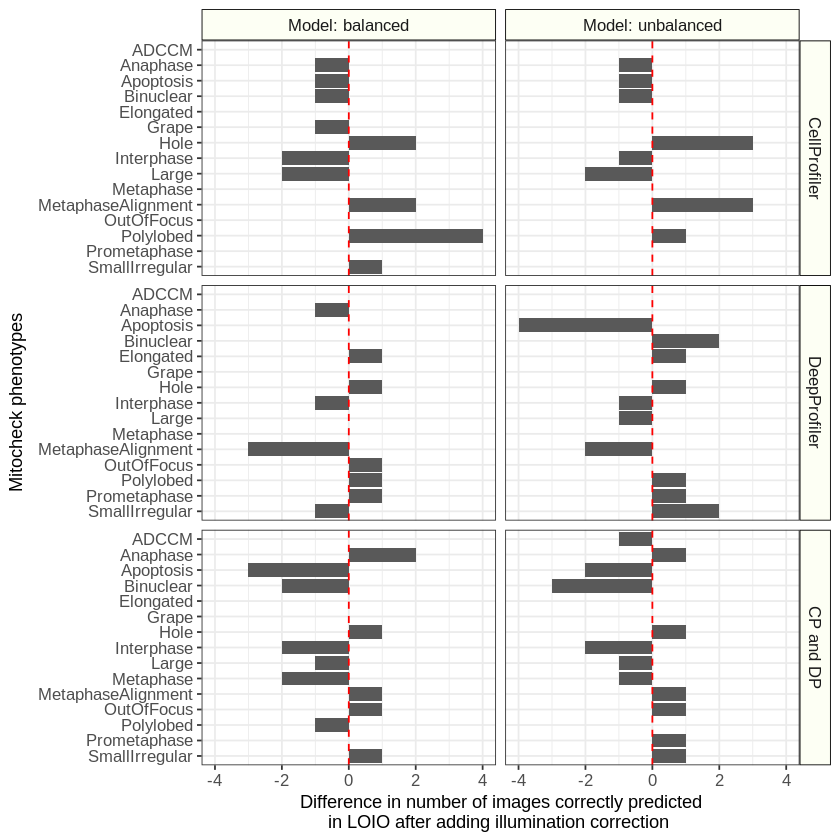

In [14]:
ic_comparison_results_gg <- (
    ggplot(ic_comparison_summary_df, aes(x = ic_impact, y = Mitocheck_Phenotypic_Class))
    + geom_bar(stat = "identity")
    + facet_grid(
        "Model_Feature_Type~Balance_type",
        labeller = labeller(Shuffled = shuffled_labeller, Balance_type = balanced_labeller)
    )
    + theme_bw()
    + phenotypic_ggplot_theme
    + labs(x = "Difference in number of images correctly predicted\nin LOIO after adding illumination correction ", y = "Mitocheck phenotypes")
    + geom_vline(xintercept = 0, linetype = "dashed", color = "red")
)

ic_comparison_results_gg

## Output combined figure

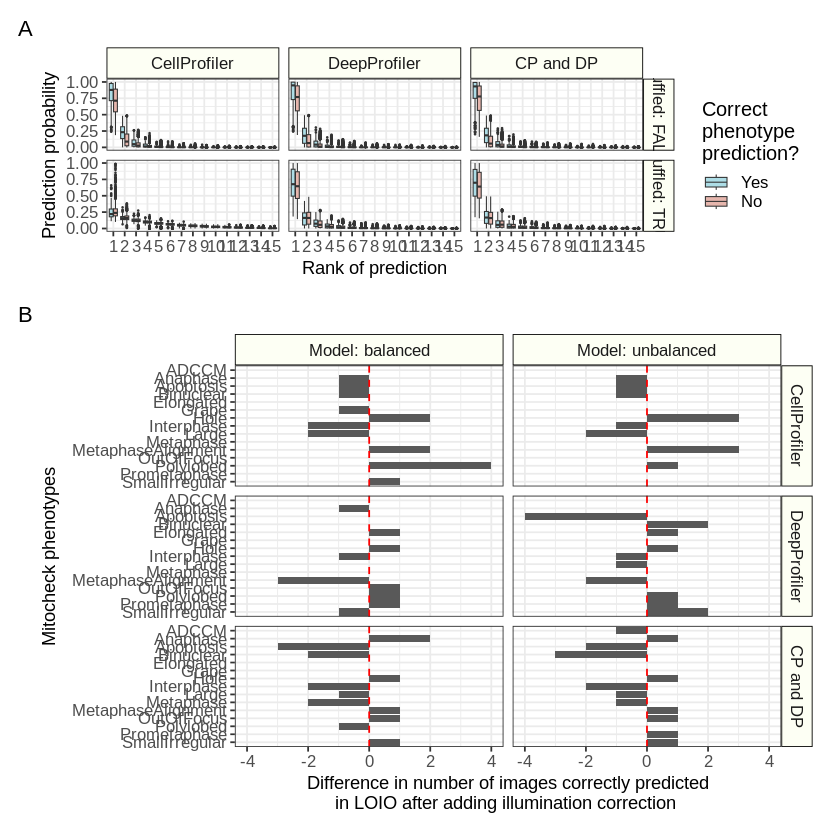

In [15]:
compiled_fig <- (
    wrap_elements(loio_feature_space_gg) / wrap_elements(ic_comparison_results_gg)
) + plot_layout(heights = c(0.5, 1)) + plot_annotation(tag_levels = "A")

ggsave(output_fig_loio, dpi = 500, height = 12, width = 10)

compiled_fig